# Multi-armed Bandit Problem and 𝜖-greedy algorithm

## Main classes and functions

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
  
# Define Action class
class Actions:
  def __init__(self, m):
    self.m = m # bandit return for this action
    self.mean = 0
    self.N = 0
  
  # Choose a random action
  def choose(self): 
    return np.random.randn() + self.m
  
  # Update the action-value estimate
  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x

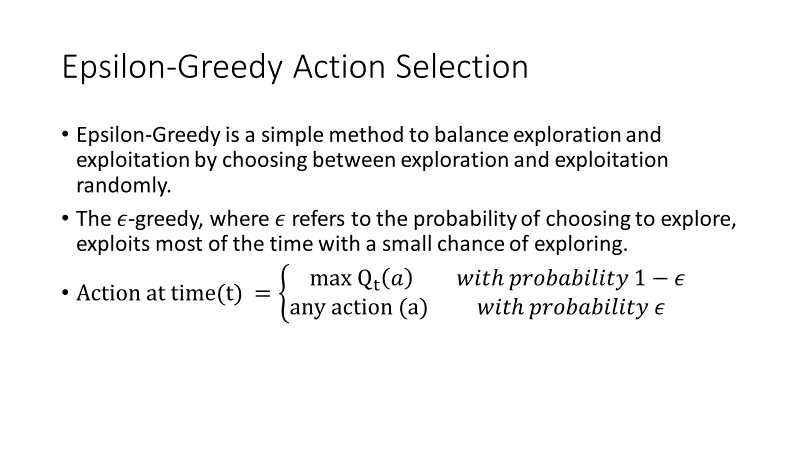

In [1]:
def run_experiment(m1, m2, m3, eps, N):
      
  actions = [Actions(m1), Actions(m2), Actions(m3)]
  
  data = np.empty(N)
    
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([a.mean for a in actions])
    x = actions[j].choose()
    actions[j].update(x)
  
    # for the plot
    data[i] = x

  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  
  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()
  
  for a in actions:
    print(a.mean)
  
  return cumulative_average

## Evaluation

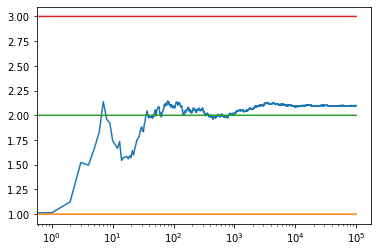

1.0013313613549268
1.9976302176463874
2.9918087028375844


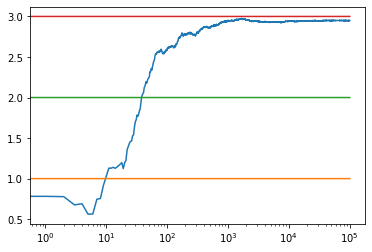

0.9948422864685824
1.9947063629096093
3.000346924263636


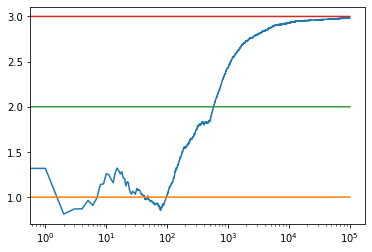

1.007171286112626
2.036161279430953
2.997216260332502


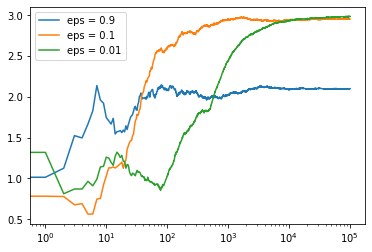

In [4]:
c_1  = run_experiment(1.0, 2.0, 3.0, 0.9,  100000)
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

# log scale plot
plt.plot(c_1, label ='eps = 0.9')
plt.plot(c_05, label ='eps = 0.1')
plt.plot(c_01, label ='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()